<a href="https://colab.research.google.com/github/walexi/class_project/blob/main/CSCA_5622_Supervised_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## Project Topic: **Machine Learning for Breast Tumor Diagnosis**

The project aims to carry out a supervised Machine Learning approach to predicting Wisconsin Breast Cancer. In this short project, I tried a bunch of ML algorithms including Logistic Regression, Random Forest Classifier, Support Vector Machine, K-Nearest Neighbors and Decision Trees.



## **Data**
Breast Cancer Wisconsin (Diagnostic) Dataset

The dataset consists of characteristics, or features, of cell nuclei taken from breast masses which were sampled using fine-needle aspiration (FNA), a common diagnostic procedure in oncology

The features of this data set are computed from a digitized image of the FNA. The dataset has a target class to determine if the cancer is benign or malign; 212 instances were diagnosed as malignant, and 357 instances were found to be benign..

The real-valued features computed for each cell nucleus are:

	1)  Radius (mean of distances from center to points on the perimeter)
	2)  Texture (standard deviation of gray-scale values)
	3)  Perimeter
	4)  Area
	5)  Smoothness (local variation in radius lengths)
	6)  Compactness (perimeter^2 / area - 1.0)
	7)  Concavity (severity of concave portions of the contour)
	8)  Concave points (number of concave portions of the contour)
	9)  Symmetry
	10) Fractal dimension ("coastline approximation" - 1)

A comprehensive details of the features are described in the paper here (https://www.researchgate.net/publication/2512520_Nuclear_Feature_Extraction_For_Breast_Tumor_Diagnosis)
A set of 569 images has been processed as described in the paper yielding a database of 30-dimensional points.


This dataset is publicly available from the University of California Irvine (UCI) Machine Learning Repository (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Data Download

In [ ]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
df = pd.concat([X, y], axis=1)
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

## Data Cleaning/Inpection

Though the data appears to be cleaned, further steps were taken to ensure it meets the expected benchmark:

In [ ]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
# dataset contains 569 rows with 31 columns/features (30 features and 1 label)
df.shape

(569, 31)

In [ ]:
# check data types and if there is any need to convert from one type to the other
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
# check for null values
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


**NOTES A**: \
As seen from the above cell outputs, there are no null or missing values

In [ ]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


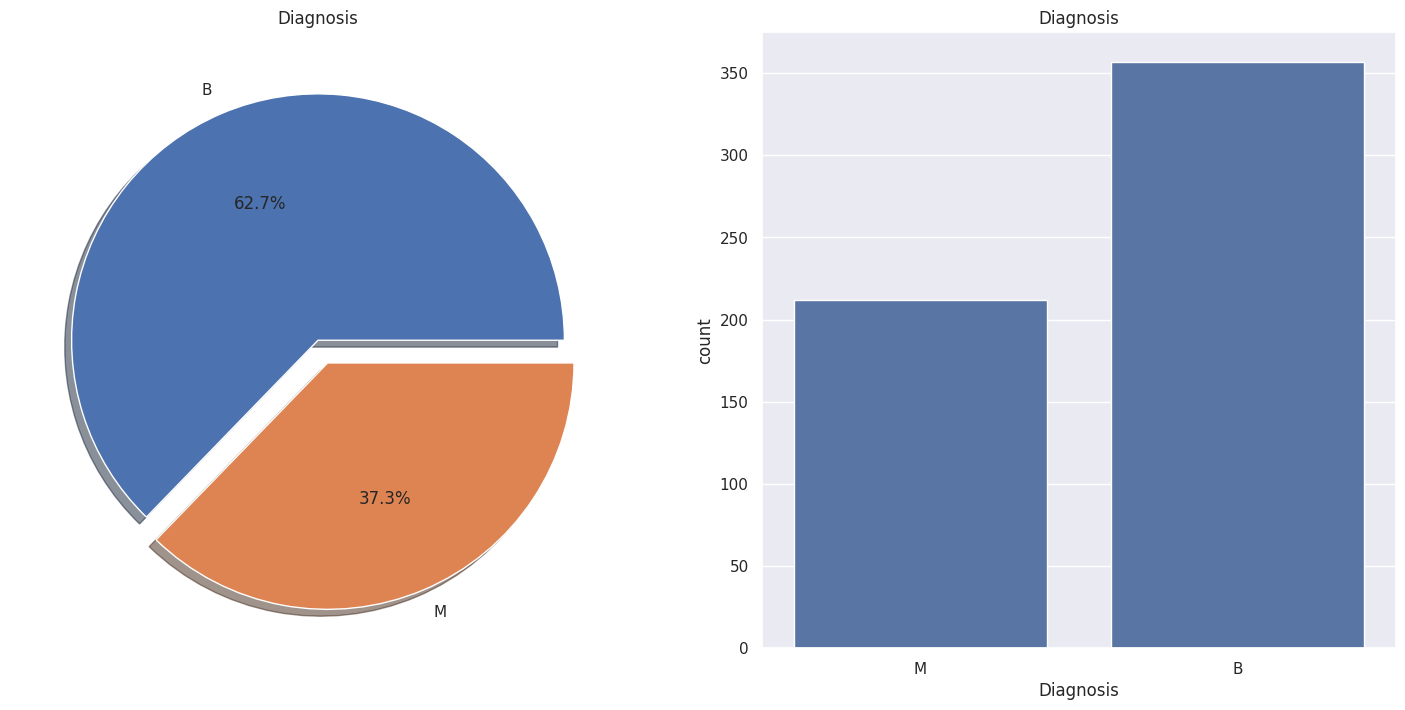

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('')
sns.countplot(df, x='Diagnosis', ax=ax[1])
ax[1].set_title('Diagnosis')
plt.show()

As seen from the plot above, the dataset is moderately balanced with the majority class being B (cancer is benign) and the minority class being M (cancer is malign). The minority class makes up about ~37% of the dataset. The degree of imabalance is mild.

In [ ]:
# The target variable (Categorical) is converted to numerical data using LabelEncoder
TARGET = 'Diagnosis'
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])
LABELS = le.classes_

In [ ]:
le

LabelEncoder()

### Exploratory Data Analysis

In [ ]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [ ]:
factors = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
           'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2',
           'concave_points2','symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3',
           'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

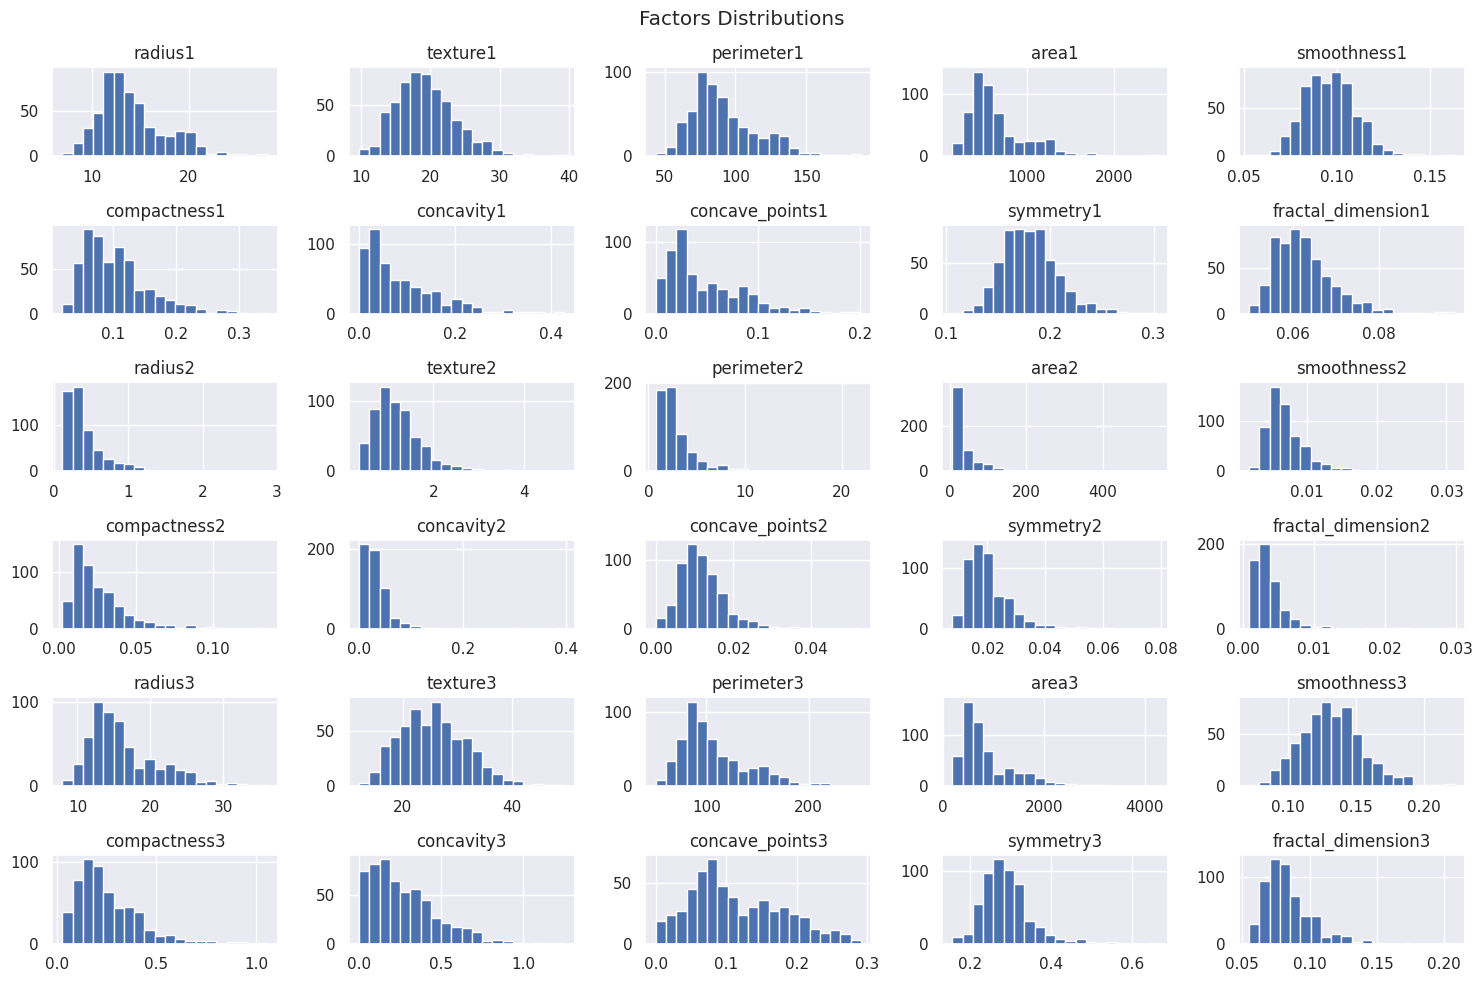

In [ ]:
df[factors].hist(figsize=(15, 10), bins=20)
plt.suptitle("Factors Distributions")
plt.tight_layout()
plt.show()

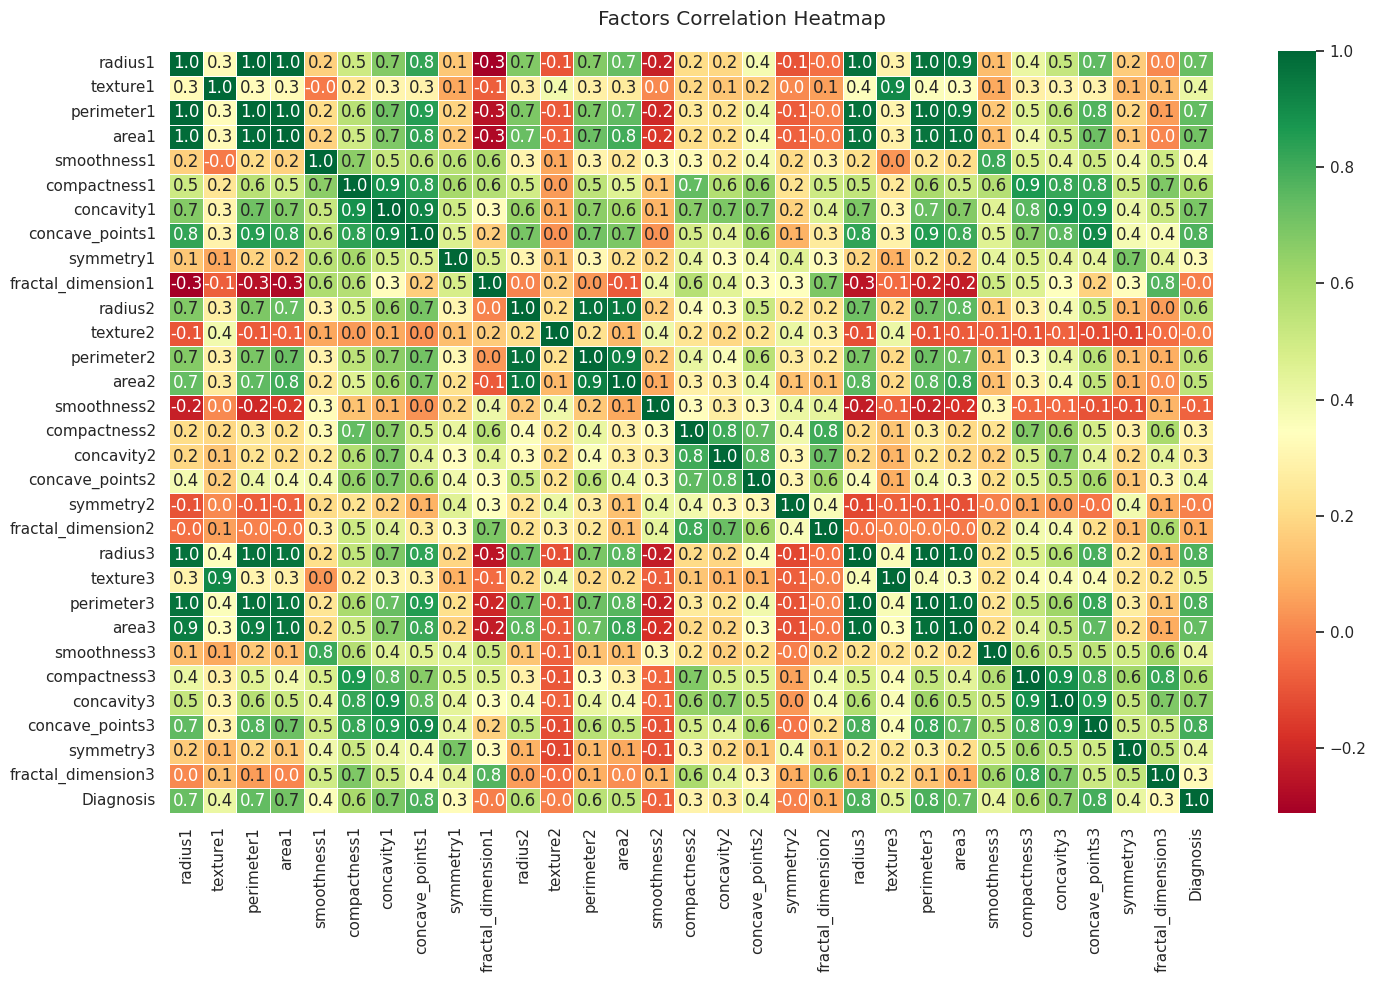

In [ ]:
# Correlation heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5,  cmap='RdYlGn', fmt='.1f', ax=ax)
plt.suptitle("Factors Correlation Heatmap")
plt.tight_layout()
plt.show()

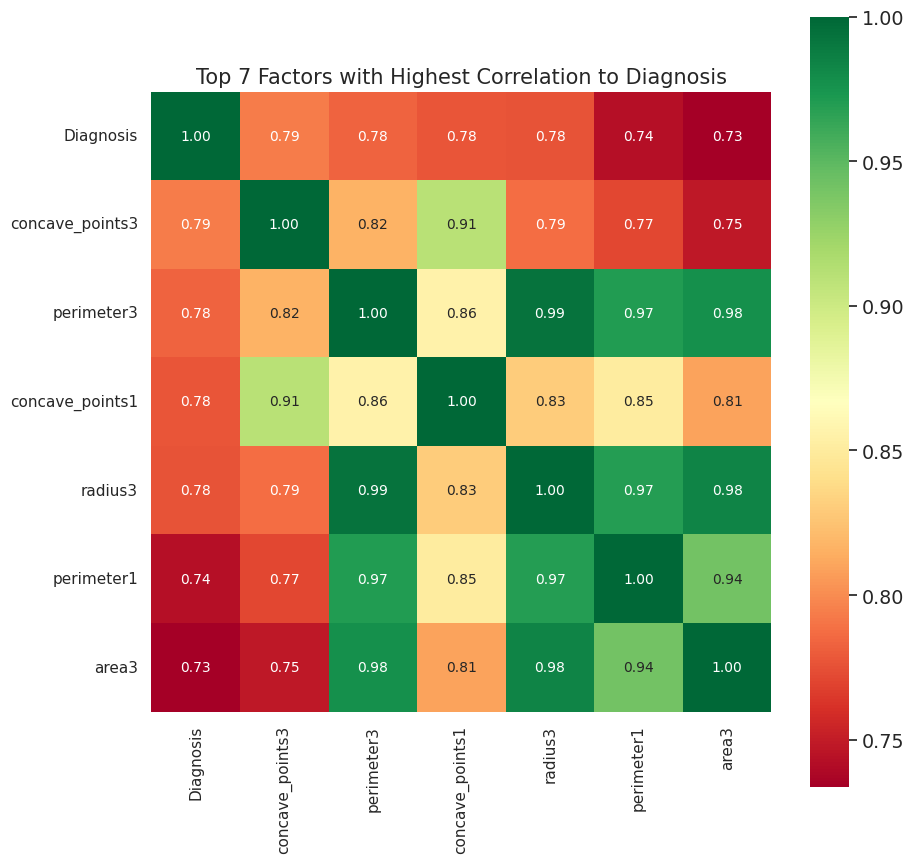

In [ ]:
# Let's zoom to the top-7 most positive correlated variables with the target.
k = 7 #number of variables for heatmap
f,ax = plt.subplots(figsize=(10,10))
TOPK_FACTORS = df.corr().nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(df[TOPK_FACTORS].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='RdYlGn', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=TOPK_FACTORS.values, xticklabels=TOPK_FACTORS.values)
plt.title(f'Top {k} Factors with Highest Correlation to {TARGET}')
plt.show()

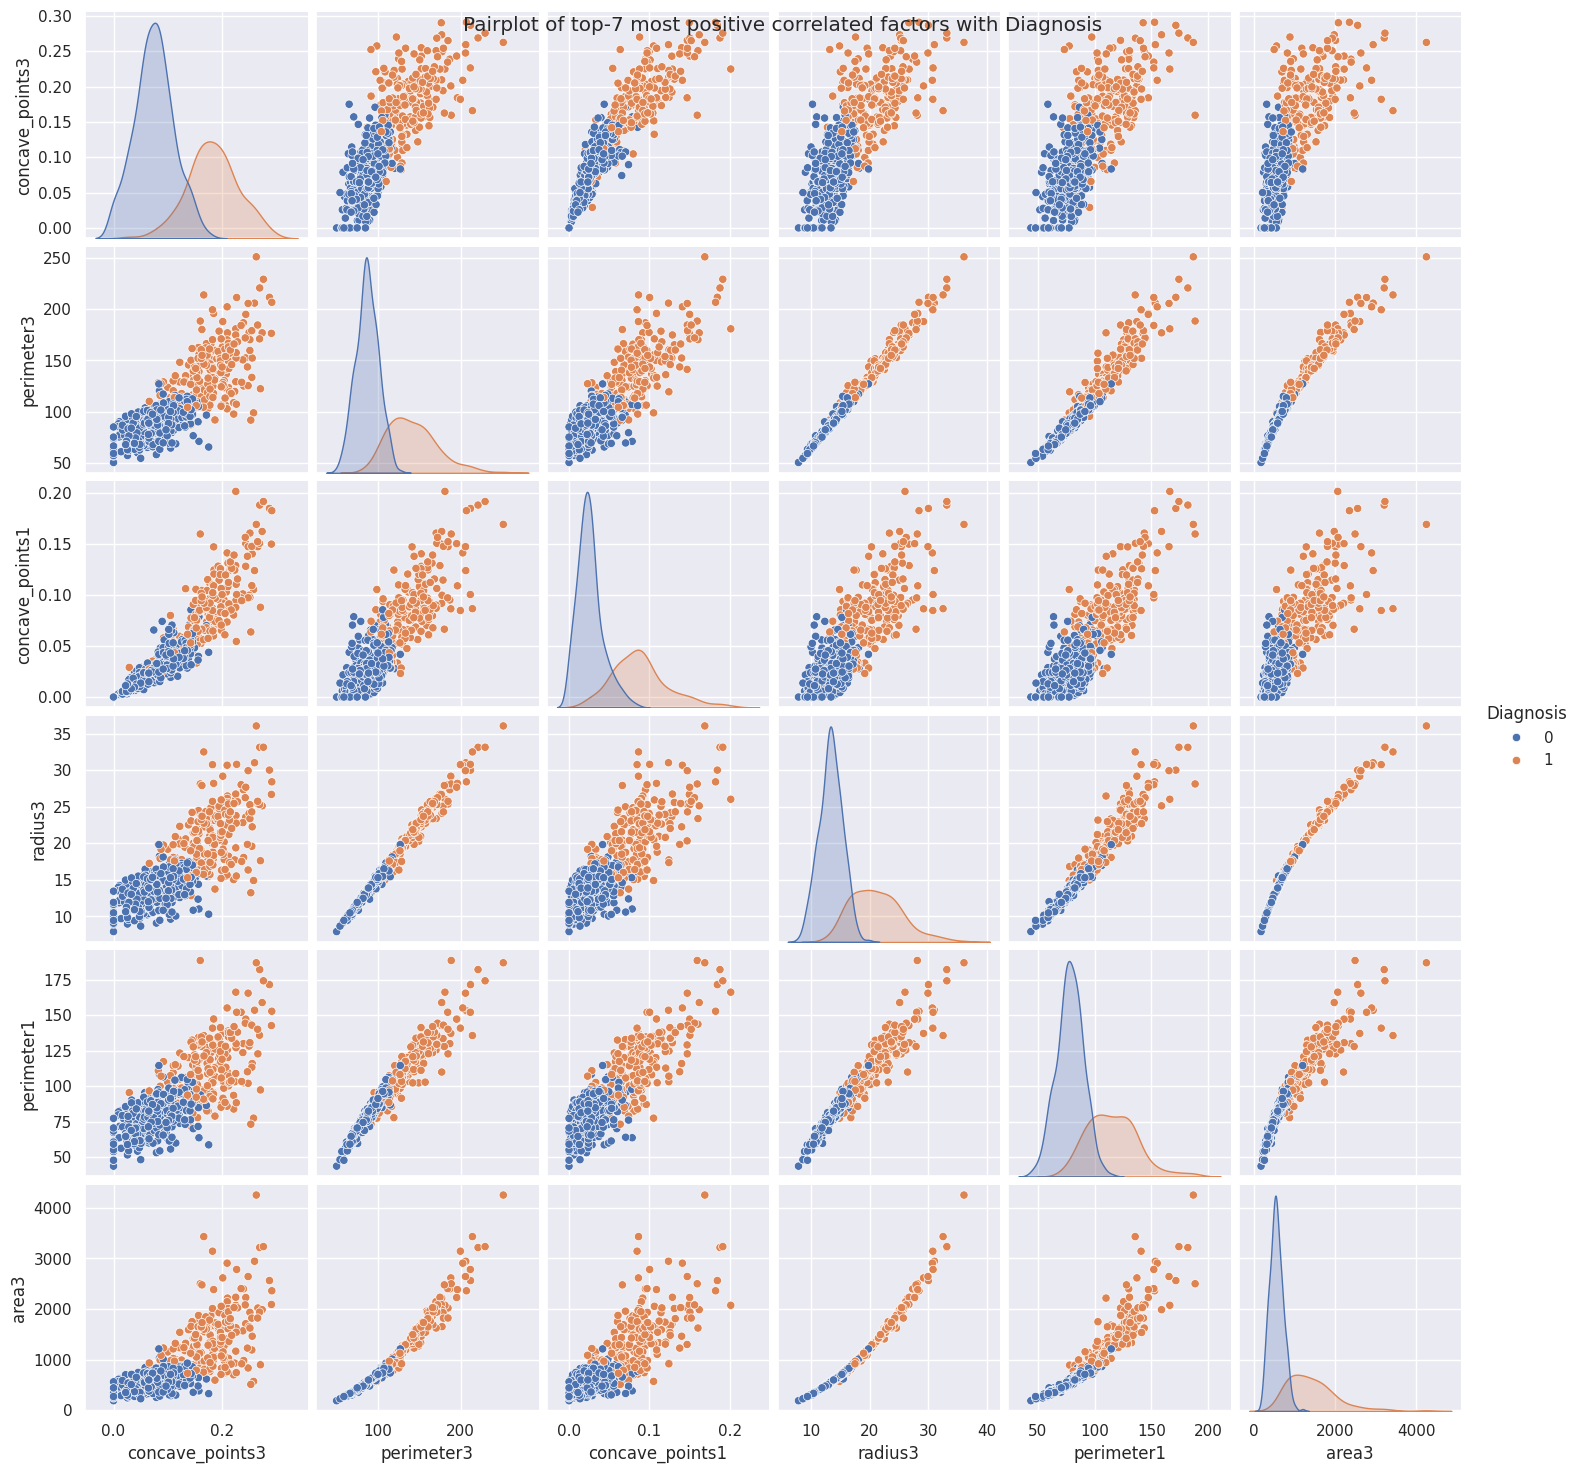

In [ ]:
# pair plot of the top k most correalated factors with the target variable (Diagnosis)
sns.set()
sns.pairplot(df[TOPK_FACTORS], height = 2.5, hue=TARGET)
plt.suptitle(f"Pairplot of top-{k} most positive correlated factors with {TARGET}")
plt.show()



> **As seen from the pairplot, the selected factors show strong correlation with the target factor - Diagnosis**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
# lets do some quick stats test to see which factors are statistically significant
# NOTE i didnt end up using this, the results didnt make sense, definitely a bad choice since the relationship between the factors and the target variable is non-linear,  so approx with a linear model
# will yield a large bias.

In [ ]:
# Remove topk correlated factors factors from the factors list
factors = [f for f in factors if f not in TOPK_FACTORS]
log_reg = sm.Logit(df[TARGET], df[factors]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.064584
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      549
Method:                           MLE   Df Model:                           19
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.9022
Time:                        23:27:49   Log-Likelihood:                -36.748
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.687e-131
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
radius1                0.0778      0.212      0.367      0.714      -0.338       0.493
text

In [ ]:
significant_factors = [a for a, b in log_reg.pvalues.to_dict().items() if b < 0.05]


> Using a p-value of 0.05, factors with high p-value such as radius1 are statistically insiginificant.




## Modelling

In [ ]:
# Define features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [ ]:
#split with a factor of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=500),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

--- Logistic Regression ---
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



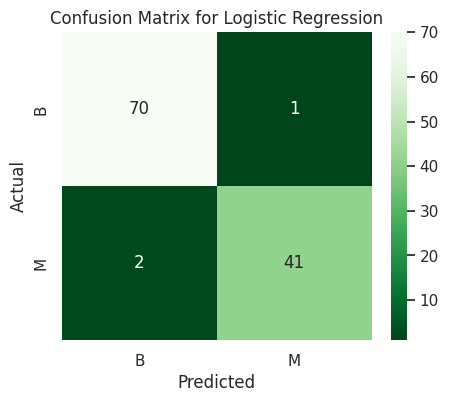



--- Random Forest ---
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



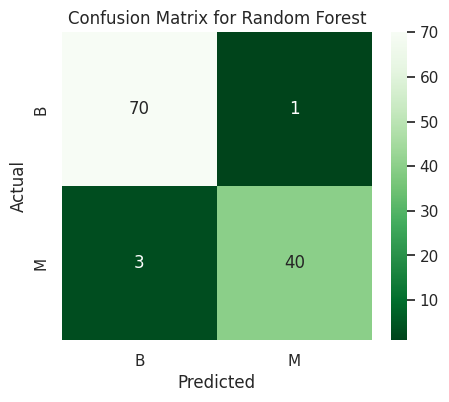



--- Support Vector Machine ---
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



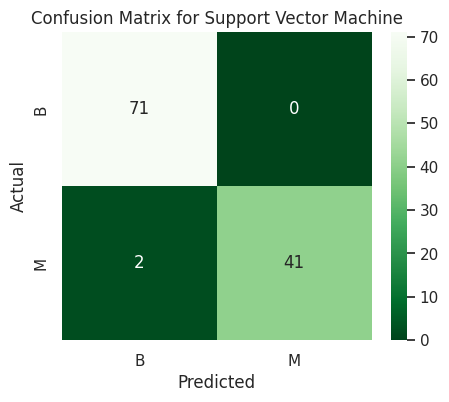



--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



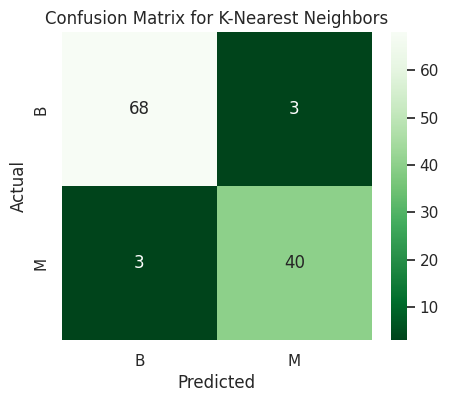



--- Decision Tree ---
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



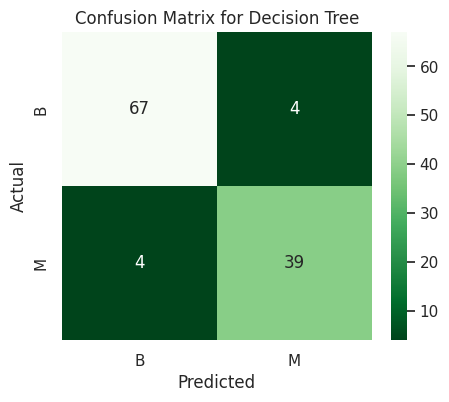

In [ ]:
# Train and evaluate models
accuracy_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred, target_names=le.classes_.tolist()))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens_r', xticklabels=le.classes_.tolist(), yticklabels=le.classes_.tolist())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    print('\n')


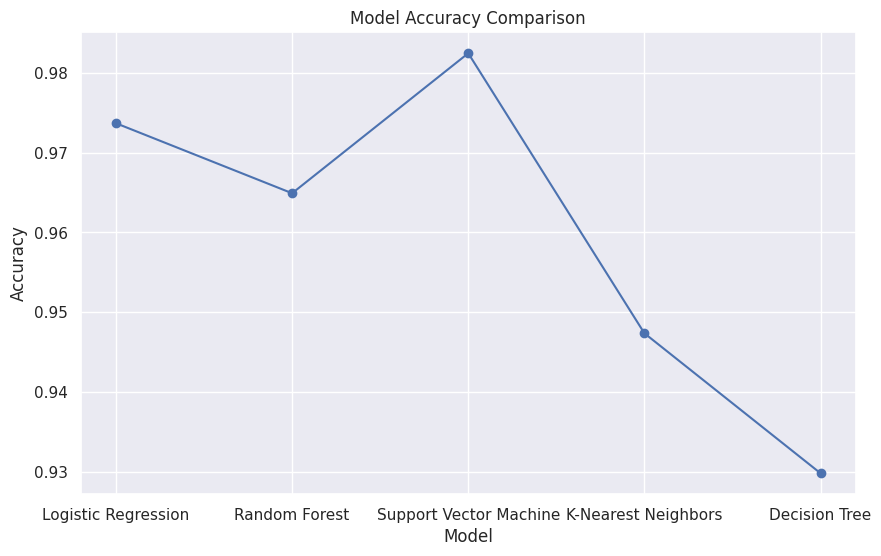

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot([score[0] for score in accuracy_scores], [score[1] for score in accuracy_scores], marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

## Hyperparameter Optimization

In [ ]:
# let search over a log space between 2e-5 and 2e5 for C and gamma with k-fold cv k=5
param_grid = {
    "C": list(np.logspace(-5, 5, base = 10, num=11)),
    "gamma": list(np.logspace(-5, 5, base = 10, num=11)),
    # "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
    }
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
print(f'Best params: {grid.best_params_} \nBest score: {grid.best_score_}')

Best params: {'C': 1000.0, 'gamma': 0.0001} 
Best score: 0.9780219780219781


In [ ]:
# from Module 6 assignment NB
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotSearchGrid(grid):

    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

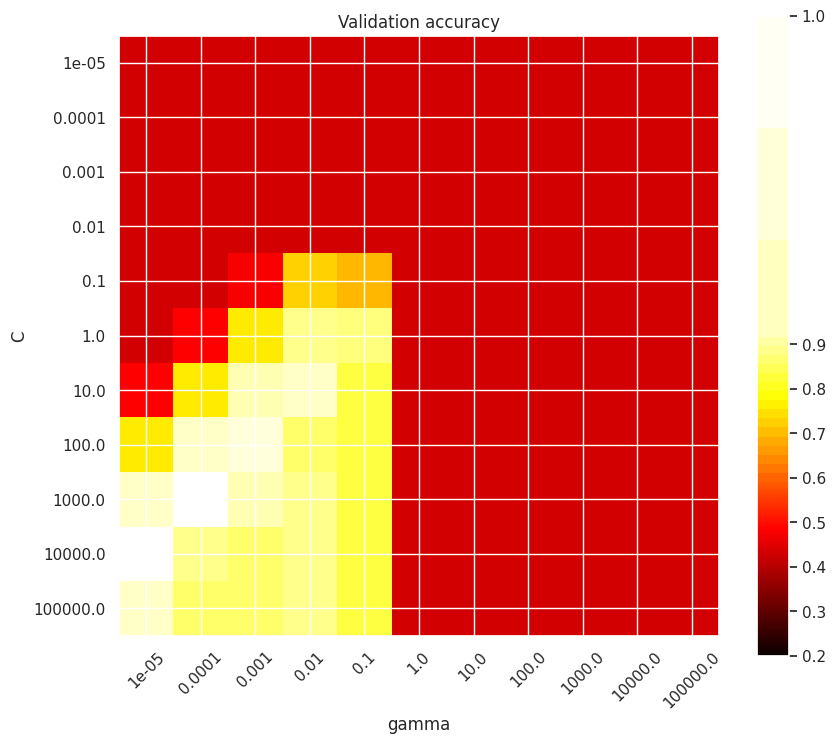

In [ ]:
plotSearchGrid(grid)

## Disussion and Conclusion

1. SVM performs best, given the relatively moderate number of features and sample size, which makes sense.
2. I tried using the results from the stats test, but it turned out it didnt help. The model used for the stats must have made a wrong assumption of the relatiionship between the features.
3. Further work will explore alternative approach to conducting the stats test and subsequently including the results in the model training to improve the model performance